In [31]:
import tqdm
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [32]:
x, y = load_digits(n_class=10,return_X_y=True)

In [33]:
x.shape, y.shape

((1797L, 64L), (1797L,))

In [34]:
%matplotlib inline

idx = 1003
img = x[idx].reshape(8,8) / 255
plt.imshow(img)
print(y[idx])

<h2> Normalização</h2>

In [35]:
# normalizar os valos dos pixes em um rance de 0-1
x = x / 255

<h2>Validação Cruzada</h2>

In [36]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

In [37]:
kf = KFold(n_splits=10)
acuracia_list = []
precisao_list = []
recall_list = []

for train_index, test_index in kf.split(x):
    train_imgs, test_imgs = x[train_index], x[test_index]
    train_labels, test_labels = y[train_index], y[test_index]
    
    # Criar novo modelo MLP
    
    mlp = MLPClassifier(hidden_layer_sizes=(100,), early_stopping=True)
    mlp.fit(train_imgs,train_labels)
    
    pred_labels = mlp.predict(test_imgs)
    acuracia_list.append(accuracy_score(test_labels, pred_labels))
    precisao_list.append(precision_score(test_labels, pred_labels,average='micro'))    
    recall_list.append(recall_score(test_labels, pred_labels,average='micro'))        


In [38]:
import numpy as np

In [39]:
np.mean(acuracia_list),np.mean(precisao_list),np.mean(recall_list)

(0.6640192427063936, 0.6640192427063936, 0.6640192427063936)

In [43]:
from PIL import Image

In [63]:
imagem_teste = Image.open("sample_0.jpg").convert("L")

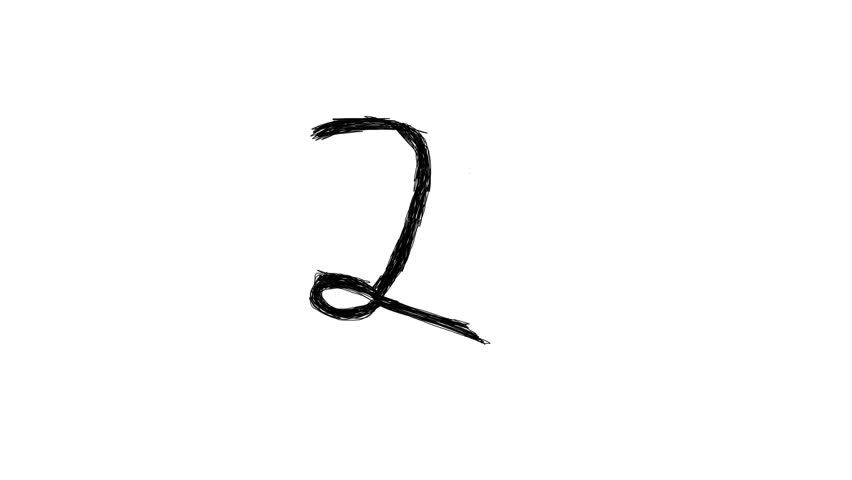

In [64]:
imagem_teste

In [70]:
img = imagem_teste.resize(size=(8,8))

In [72]:
img

In [79]:
imagem_teste = np.asarray(img)

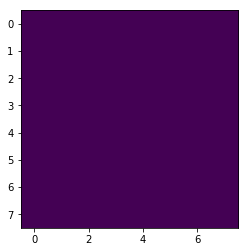

In [80]:
plt.imshow(imagem_teste)